# Week 8: Instrumental Variable Analysis

<b>Goal:</b> Estimate returns from schooling 

In [1]:
use data/ak91.dta, clear
grstyle init
grstyle set plain, horizontal grid


In [2]:
su


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         AGE |    200,000    39.94814    5.921557         30         50
        AGEQ |    200,000    40.32245    5.912487      30.25         50
        EDUC |    200,000    12.83299    3.268312          0         20
     ENOCENT |    200,000      .20144     .401077          0          1
     ESOCENT |    200,000     .063565     .243977          0          1
-------------+---------------------------------------------------------
    LWKLYWGE |    200,000    5.681435    .7146346  -2.341806    10.5321
     MARRIED |    200,000     .842315    .3644463          0          1
      MIDATL |    200,000      .16536    .3715061          0          1
          MT |    200,000      .04857    .2149679          0          1
      NEWENG |    200,000     .055675    .2292936          0          1
-------------+-------------------------------------------------

In [3]:
gen yqob = YOB + QOB*.25 - .25

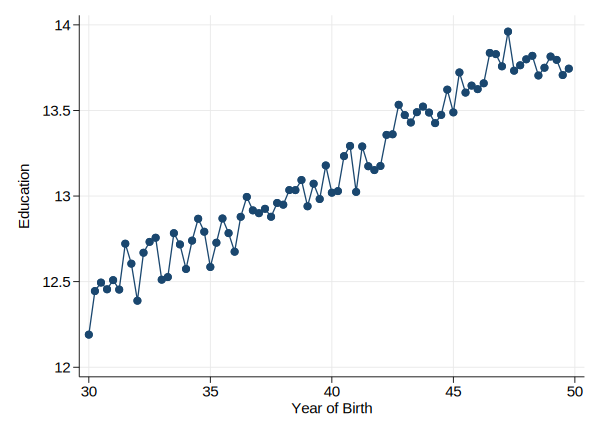

In [4]:
binscatter EDUC yqob if YOB<50, xtitle(Year of Birth) ytitle(Education) linetype(connect) nquantiles(80)
graph di

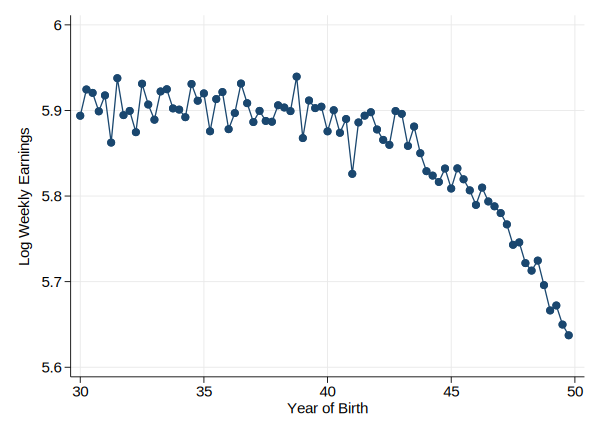

In [5]:
binscatter LWKLYWGE yqob if YOB<50, xtitle(Year of Birth) ytitle(Log Weekly Earnings) linetype(connect) nquantiles(80)
graph di

In [6]:
keep if COHORT<20.30

(153,410 observations deleted)


## OLS

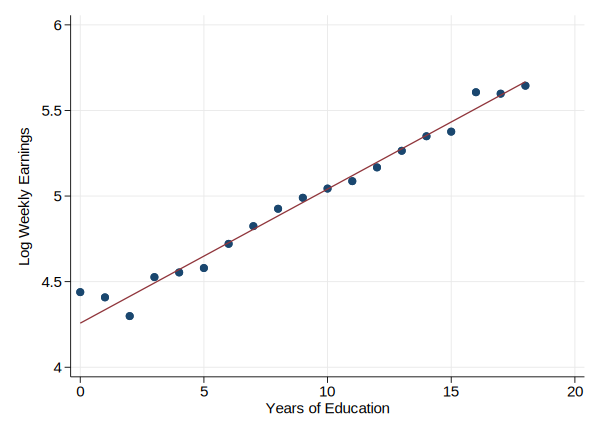

In [7]:
qui binscatter LWKLYWGE EDUC, ytitle(Log Weekly Earnings) xtitle(Years of Education) 
graph di

In [8]:
eststo clear

qui eststo: reghdfe LWKLYWGE EDUC YR20-YR28 , vce(robust) noabsorb
qui eststo: reghdfe LWKLYWGE EDUC AGEQ AGEQSQ YR20-YR28 , vce(robust) noabsorb
qui eststo: reghdfe LWKLYWGE EDUC AGEQ AGEQSQ NEWENG MIDATL ENOCENT WNOCENT SOATL ESOCENT WSOCENT MT YR20-YR28 , vce(robust) noabsorb

esttab, drop(YR*)







------------------------------------------------------------
                      (1)             (2)             (3)   
                 LWKLYWGE        LWKLYWGE        LWKLYWGE   
------------------------------------------------------------
EDUC               0.0784***       0.0784***       0.0755***
                  (85.91)         (85.91)         (82.90)   

AGEQ                                0.214           0.188   
                                   (1.40)          (1.24)   

AGEQSQ                           -0.00244        -0.00221   
                                  (-1.44)         (-1.32)   

NEWENG                                            -0.0438***
                                                  (-3.37)   

MIDATL                                            -0.0411***
                                                  (-4.45)   

ENOCENT                                           0.00671   
                                                   (0.73)   

WNOCENT     

## First Stage Regression

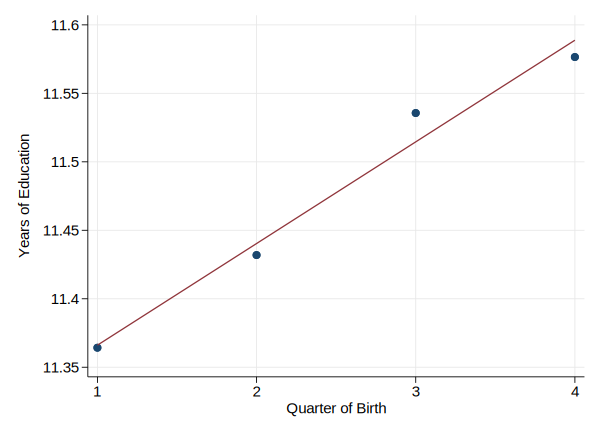

In [9]:
binscatter EDUC QOB, xtitle(Quarter of Birth) ytitle(Years of Education)
graph di

In [10]:
eststo clear

qui eststo: reghdfe EDUC QTR1 QTR2 QTR3 YR20-YR28 , vce(robust) noabsorb
qui eststo: reghdfe EDUC QTR1 QTR2 QTR3 AGEQ AGEQSQ YR20-YR28 , vce(robust) noabsorb
qui eststo: reghdfe EDUC QTR1 QTR2 QTR3 AGEQ AGEQSQ NEWENG MIDATL ENOCENT WNOCENT SOATL ESOCENT WSOCENT MT YR20-YR28 , vce(robust) noabsorb

esttab, drop(YR*)







------------------------------------------------------------
                      (1)             (2)             (3)   
                     EDUC            EDUC            EDUC   
------------------------------------------------------------
QTR1               -0.206***      -0.0807          -0.101   
                  (-4.67)         (-0.89)         (-1.13)   

QTR2               -0.141**       -0.0580         -0.0711   
                  (-3.16)         (-0.85)         (-1.05)   

QTR3              -0.0412       -0.000348        -0.00148   
                  (-0.95)         (-0.01)         (-0.03)   

AGEQ                                0.466           0.400   
                                   (0.59)          (0.51)   

AGEQSQ                           -0.00702        -0.00629   
                                  (-0.73)         (-0.66)   

NEWENG                                             -0.365***
                                                  (-4.81)   

MIDATL      

### Reduced Form

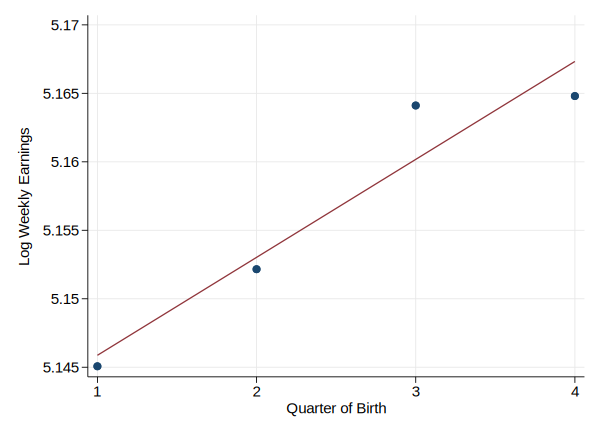

In [11]:
binscatter LWKLYWGE QOB, xtitle(Quarter of Birth) ytitle(Log Weekly Earnings)
graph di

In [12]:
eststo clear

qui eststo: reghdfe LWKLYWGE QTR1 QTR2 QTR3 YR20-YR28 , vce(robust) noabsorb
qui eststo: reghdfe LWKLYWGE QTR1 QTR2 QTR3 AGEQ AGEQSQ YR20-YR28 , vce(robust) noabsorb
qui eststo: reghdfe LWKLYWGE QTR1 QTR2 QTR3 AGEQ AGEQSQ NEWENG MIDATL ENOCENT WNOCENT SOATL ESOCENT WSOCENT MT YR20-YR28 , vce(robust) noabsorb

esttab, drop(YR*)







------------------------------------------------------------
                      (1)             (2)             (3)   
                 LWKLYWGE        LWKLYWGE        LWKLYWGE   
------------------------------------------------------------
QTR1              -0.0196*        -0.0138         -0.0180   
                  (-2.29)         (-0.82)         (-1.08)   

QTR2              -0.0126        -0.00915         -0.0120   
                  (-1.47)         (-0.71)         (-0.95)   

QTR3            -0.000640        0.000891        0.000109   
                  (-0.08)          (0.09)          (0.01)   

AGEQ                                0.259           0.231   
                                   (1.70)          (1.53)   

AGEQSQ                           -0.00296        -0.00266   
                                  (-1.60)         (-1.46)   

NEWENG                                            -0.0714***
                                                  (-5.02)   

MIDATL      

## Instrumental Variable Estimation

In [13]:
eststo clear

qui eststo: ivreghdfe LWKLYWGE (EDUC = QTR1 QTR2 QTR3) YR20-YR28 
qui eststo: ivreghdfe LWKLYWGE (EDUC = QTR1 QTR2 QTR3) AGEQ AGEQSQ YR20-YR28
qui eststo: ivreghdfe LWKLYWGE (EDUC = QTR1 QTR2 QTR3) AGEQ AGEQSQ NEWENG MIDATL ENOCENT WNOCENT SOATL ESOCENT WSOCENT MT YR20-YR28

esttab, drop(YR*)







------------------------------------------------------------
                      (1)             (2)             (3)   
                 LWKLYWGE        LWKLYWGE        LWKLYWGE   
------------------------------------------------------------
EDUC                0.101**         0.193           0.182   
                   (2.96)          (0.70)          (0.81)   

AGEQ                                0.173           0.160   
                                   (0.82)          (0.85)   

AGEQSQ                           -0.00161        -0.00152   
                                  (-0.57)         (-0.62)   

NEWENG                                           -0.00496   
                                                  (-0.06)   

MIDATL                                             0.0151   
                                                   (0.13)   

ENOCENT                                            0.0917   
                                                   (0.51)   

WNOCENT     